In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [76]:
true = pd.read_csv('true.csv')

In [77]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [78]:

true.shape

(21417, 4)

In [79]:
fake=pd.read_csv("fake.csv")

In [80]:
fake.head()
fake.shape

(23481, 4)

In [81]:
true['label'] = 1
fake['label'] = 0

In [82]:
# Use the the first 5000 data of true and fake dataset for building the model.
frames = [true.loc[:5000][:], fake.loc[:5000][:]]

In [83]:
df = pd.concat(frames)

In [84]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [85]:
!pip install scikit-learn --upgrade

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [86]:
X = df. drop('label', axis=1)
y = df['label']

In [87]:
df = df.dropna()
df2 = df.copy()

In [88]:
df2.reset_index(inplace=True)
df2.tail()

,index,title,text,subject,date,label
9997,4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",0
9998,4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",0
9999,4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016",0
10000,4999,CNN Panelist LAUGHS In Corey Lewandowski’s Fa...,As Donald Trump s campaign continues to sink d...,News,"August 18, 2016",0
10001,5000,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",News,"August 18, 2016",0


In [89]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [90]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    #print(i)
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RASHMITH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [92]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [93]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [95]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.998


In [96]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


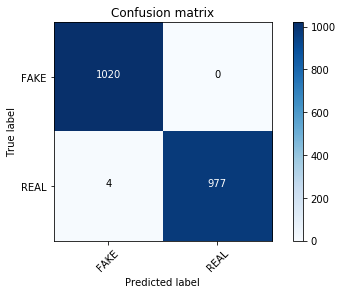

In [97]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [98]:
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'mani c word hillari compet one ouch'

In [99]:
val = tfidf_v.transform([review]).toarray()

In [100]:
classifier.predict(val)

array([0], dtype=int64)

In [101]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [102]:
import pickle

# Load pre-trained model and vectorizer
try:
    joblib_model = pickle.load(open('model2.pkl', 'rb'))
    joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
except FileNotFoundError:
    print("Error: Model or vectorizer file not found. Ensure 'model2.pkl' and 'tfidfvect2.pkl' are in the same directory.")
    exit()

# Preprocess and classify news input
def classify_news(review):
    if not review.strip():
        return "Error: Empty input. Please enter a valid news statement."
    
    # Transform user input using the pre-trained vectorizer
    val_pkl = joblib_vect.transform([review]).toarray()
    # Predict using the loaded model
    test_pred = joblib_model.predict(val_pkl)
    if test_pred == 0:
        return "Fake News!"
    else:
        return "Real News"

# Interactive loop for predictions
print("Welcome to the Fake News Detector!")
print("Type a news statement to classify it as 'Fake News' or 'Real News'.")
print("Type 'exit' to quit the program.")

while True:
    user_input = input("\nEnter a news statement: ")
    if user_input.lower() == 'exit':
        print("Exiting the Fake News Detector. Goodbye!")
        break
    result = classify_news(user_input)
    print(f"Prediction: {result}")


Welcome to the Fake News Detector!
Type a news statement to classify it as 'Fake News' or 'Real News'.
Type 'exit' to quit the program.
Prediction: Fake News!
Prediction: Real News
Exiting the Fake News Detector. Goodbye!
